In [1]:
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import torch
from torch.utils.data import DataLoader

In [2]:
sys.path.append("../src")
import prediction
from dataset import FSDDataset
from model import ConformerModel, GRUModel, ResNet, CRNN

In [3]:
test_truth = pd.read_csv('../meta/test_truth.csv')
test_truth.head()

,path,label
0,dataset/test/jackson_0.wav,4
1,dataset/test/jackson_1.wav,4
2,dataset/test/jackson_2.wav,4
3,dataset/test/jackson_3.wav,4
4,dataset/test/jackson_4.wav,4


## prediction and plot

In [4]:
def plot_confusion_matrix(predict, ground_truth, title=None, cmap=plt.cm.Blues, model_name=None):
    cm = confusion_matrix(predict, ground_truth)
    plt.figure()
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel("Predicted")
    plt.xlabel("Ground truth")
    plt.savefig(model_name + '.png')
    plt.show()

In [5]:
def generate_confusion_matrix(pred_by_fold: np.ndarray, truth_path: str, model_name: str):
    test_truth = pd.read_csv(truth_path)

    pred = pred_by_fold.sum(axis=0) // 3

    truth_values = test_truth['label'].values
    title = f'acc: {str(accuracy_score(truth_values, pred))}'
    plot_confusion_matrix(pred, truth_values, title=title, model_name=model_name)

### ConformerModel

In [6]:
testset = FSDDataset(
    audio_path='../../dataset',
    metadata_path='../meta/test_not_mount.csv',
    win_size_rate=0.025,
    overlap=0.5,
    n_mels=32,
    training=False,
    n_channels=1,
)
testloader = DataLoader(testset, batch_size=16, pin_memory=True)

device = torch.device('cpu')
model_name = 'ConformerModel'
weight_path = '../results/20210627092226/'

In [7]:
preds_by_fold = []
for fold in range(3):
    pred = prediction.run(model_name, weight_path + f'fold{fold}-best.pt', testloader, device)
    preds_by_fold.append(pred)

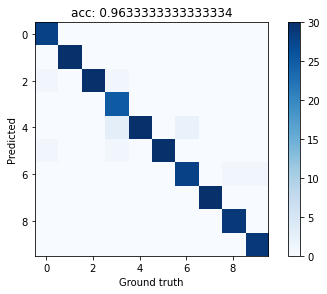

In [9]:
preds_by_fold = np.array(preds_by_fold)
generate_confusion_matrix(preds_by_fold, '../meta/test_truth.csv', model_name)
conf_res = preds_by_fold

### ConformerModel with mixup

In [10]:
testset = FSDDataset(
    audio_path='../../dataset',
    metadata_path='../meta/test_not_mount.csv',
    win_size_rate=0.025,
    overlap=0.5,
    n_mels=32,
    training=False,
    n_channels=1,
)
testloader = DataLoader(testset, batch_size=16, pin_memory=True)

device = torch.device('cpu')
model_name = 'ConformerModel'
weight_path = '../results/20210627233530/'

In [ ]:
preds_by_fold = []
for fold in range(3):
    pred = prediction.run(model_name, weight_path + f'fold{fold}-best.pt', testloader, device)
    preds_by_fold.append(pred)

In [ ]:
preds_by_fold = np.array(preds_by_fold)
generate_confusion_matrix(preds_by_fold, '../meta/test_truth.csv', model_name)
conf_mixup_res = preds_by_fold

### GRUModel

In [ ]:
testset = FSDDataset(
    audio_path='../../dataset',
    metadata_path='../meta/test_not_mount.csv',
    win_size_rate=0.025,
    overlap=0.5,
    n_mels=32,
    training=False,
    n_channels=1,
)
testloader = DataLoader(testset, batch_size=16, pin_memory=True)

device = torch.device('cpu')
model_name = 'GRUModel'
weight_path = '../results/20210626164623/'

In [ ]:
preds_by_fold = []
for fold in range(3):
    pred = prediction.run(model_name, weight_path + f'fold{fold}-best.pt', testloader, device)
    preds_by_fold.append(pred)

In [ ]:
preds_by_fold = np.array(preds_by_fold)
generate_confusion_matrix(preds_by_fold, '../meta/test_truth.csv', model_name)
gru_res = preds_by_fold

### ResNetModel 18

In [ ]:
res18_100_res = np.load('../results/20210627152347/pred.npy')

In [ ]:
# testset = FSDDataset(
#     audio_path='../../dataset',
#     metadata_path='../meta/test_not_mount.csv',
#     win_size_rate=0.025,
#     overlap=0.5,
#     n_mels=32,
#     training=False,
#     n_channels=3,
# )
# testloader = DataLoader(testset, batch_size=16, pin_memory=True)

# device = torch.device('cpu')
# model_name = 'resnet18'
# weight_path = '../results/20210627152347/'

In [ ]:
# preds_by_fold = []
# for fold in range(3):
#     pred = prediction.run(model_name, weight_path + f'fold{fold}-best.pt', testloader, device)
#     preds_by_fold.append(pred)

In [ ]:
# preds_by_fold = np.array(preds_by_fold)
# generate_confusion_matrix(preds_by_fold, '../meta/test_truth.csv', model_name)
# res18_res = preds_by_fold

### ResNetModel 34

In [ ]:
res34_100_res = np.load('../results/20210627162055/pred.npy')

In [ ]:
# testset = FSDDataset(
#     audio_path='../../dataset',
#     metadata_path='../meta/test_not_mount.csv',
#     win_size_rate=0.025,
#     overlap=0.5,
#     n_mels=32,
#     training=False,
#     n_channels=3,
# )
# testloader = DataLoader(testset, batch_size=16, pin_memory=True)

# device = torch.device('cpu')
# model_name = 'resnet34'
# weight_path = '../results/20210627162055/'

In [ ]:
# preds_by_fold = []
# for fold in range(3):
#     pred = prediction.run(model_name, weight_path + f'fold{fold}-best.pt', testloader, device)
#     preds_by_fold.append(pred)

In [ ]:
# preds_by_fold = np.array(preds_by_fold)
# generate_confusion_matrix(preds_by_fold, '../meta/test_truth.csv', model_name)
# res34_res = preds_by_fold

## ensemble

ConformerModel: 20210627233530  
GRUModel: 20210626164623  
ResNet18: 20210627152347  
ResNet34: 20210627162055  

In [27]:
conf_res = conf_res.sum(axis=0) // 3
conf_mixup_res = conf_mixup_res.sum(axis=0) // 3
gru_res = gru_res.sum(axis=0) // 3
res18_100_res = res18_100_res.sum(axis=0) // 3
res34_100_res = res34_100_res.sum(axis=0) // 3

In [28]:
ensemble = []
for i in range(len(conf_res)):
    vote_dict = {
        0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0
    }
    
    vote_dict[conf_res[i]] += 1
    vote_dict[conf_mixup_res[i]] += 1    
    vote_dict[gru_res[i]] += 1    
    vote_dict[res18_100_res[i]] += 1
    vote_dict[res34_100_res[i]] += 1
    
    vote_sorted = sorted(vote_dict.items(), key=lambda x:x[1])
    ensemble.append(vote_sorted[-1][0])

ensemble = np.array(ensemble)

TypeError: object of type 'numpy.int64' has no len()

In [ ]:
acc = accuracy_score(truth_values, ensemble)
title = 'acc: ' + str(acc)
plot_confusion_matrix(ensemble, truth_values, title=title, model_name='ensemble')

ConformerModel: 20210627233530  
GRUModel: 20210626164623  
ResNet18: 20210628032922  
ResNet34: 20210628051022  

In [ ]:
res18_50_res = np.load('../results/20210628032922/pred.npy')
res34_50_res = np.load('../results/20210628051022/pred.npy')

In [ ]:
conf_res = conf_res.sum(axis=0) // 3
conf_mixup_res = conf_mixup_res.sum(axis=0) // 3
gru_res = gru_res.sum(axis=0) // 3
res18_50_res = res18_50_res.sum(axis=0) // 3
res34_50_res = res34_50_res.sum(axis=0) // 3

In [ ]:
ensemble = []
for i in range(len(conf_res)):
    vote_dict = {
        0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0
    }
    
    vote_dict[conf_res[i]] += 1
    vote_dict[conf_mixup_res[i]] += 1    
    vote_dict[gru_res[i]] += 1    
    vote_dict[res18_50_res[i]] += 1
    vote_dict[res34_50_res[i]] += 1
    
    vote_sorted = sorted(vote_dict.items(), key=lambda x:x[1])
    ensemble.append(vote_sorted[-1][0])

ensemble = np.array(ensemble)

In [ ]:
acc = accuracy_score(truth_values, ensemble)
title = 'acc: ' + str(acc)
plot_confusion_matrix(ensemble, truth_values, title=title, model_name='ensemble')

## plot pred.npy

In [23]:
def plot_confusion_matrix(predict, ground_truth, title=None, cmap=plt.cm.Blues):
    """
    予測結果の混合行列をプロット
    Args:
        predict: 予測結果
        ground_truth: 正解ラベル
        title: グラフタイトル
        cmap: 混合行列の色
    Returns:
        Nothing
    """

    cm = confusion_matrix(predict, ground_truth)
    plt.figure()
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel("Predicted")
    plt.xlabel("Ground truth")
    plt.show()

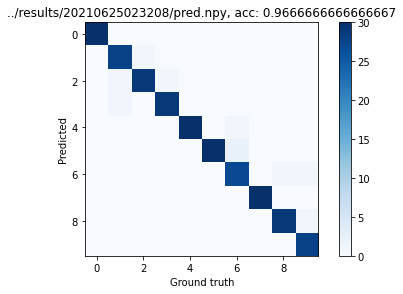

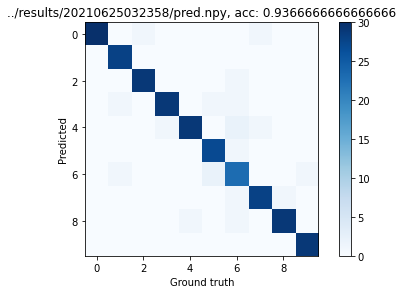

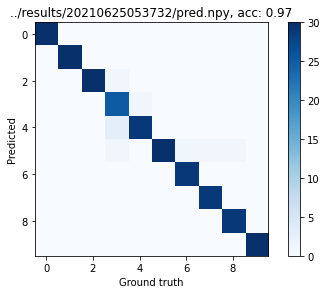

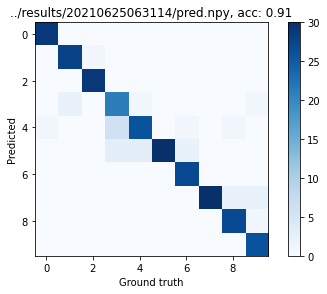

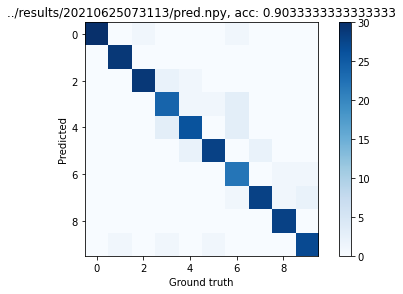

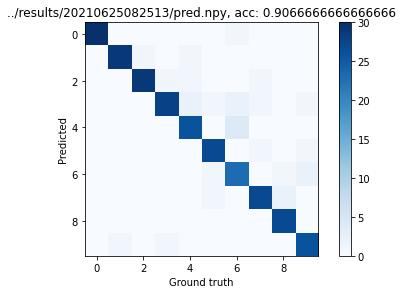

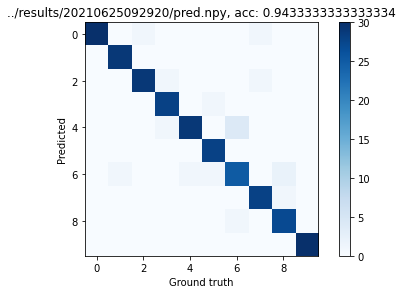

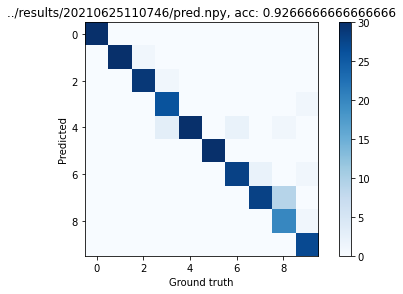

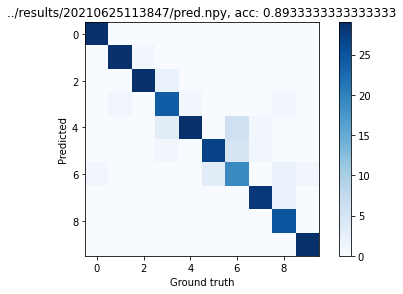

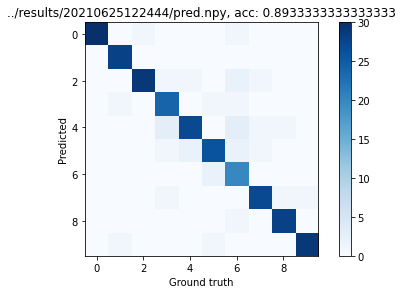

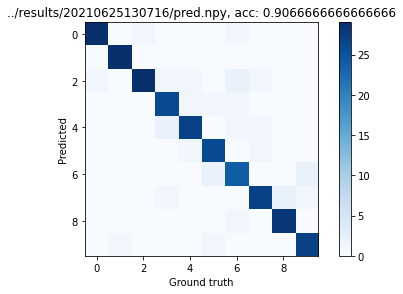

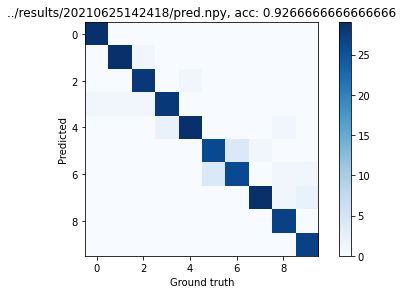

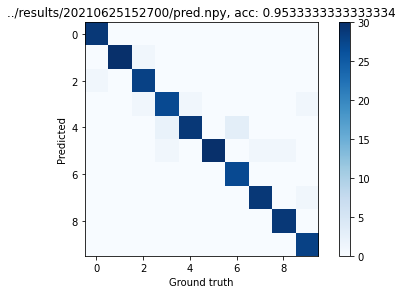

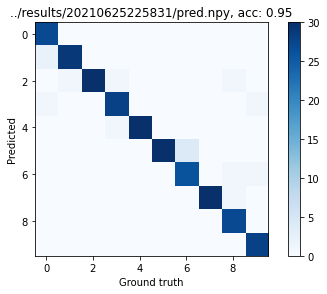

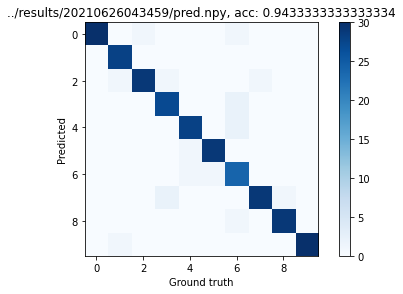

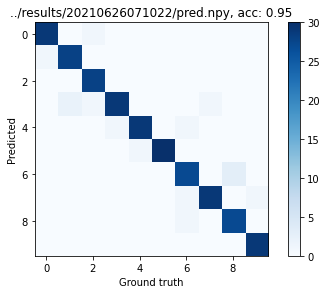

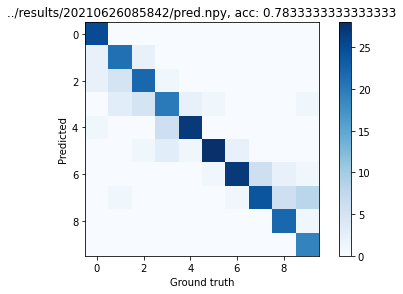

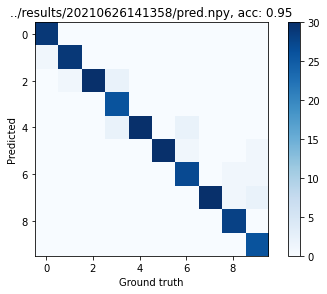

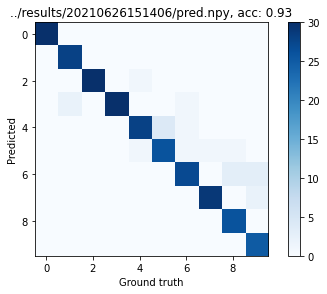

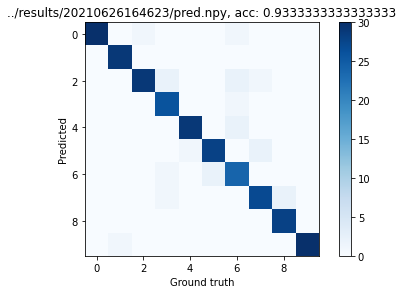

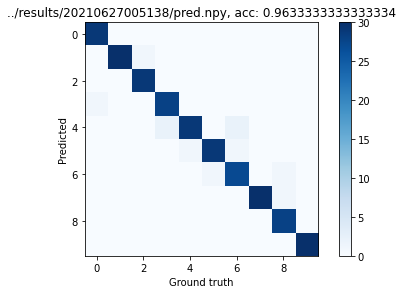

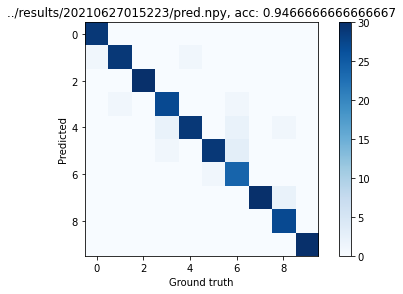

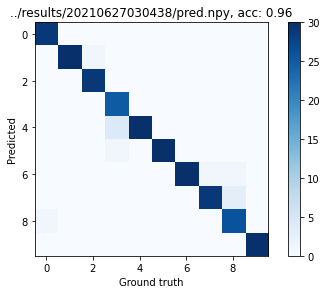

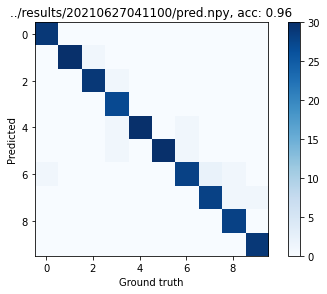

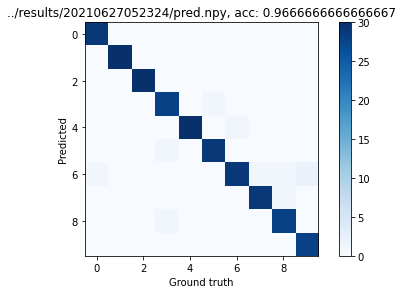

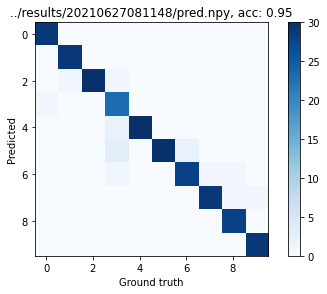

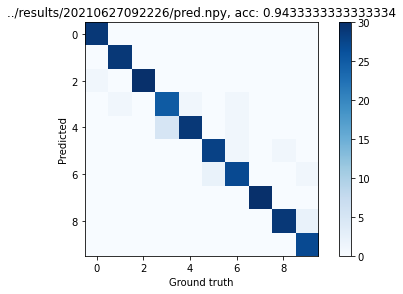

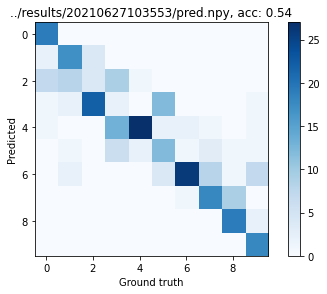

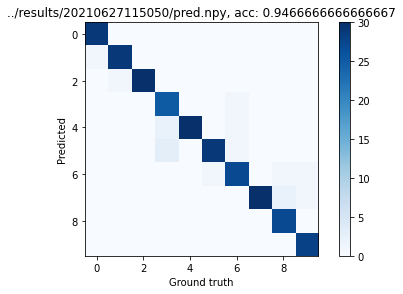

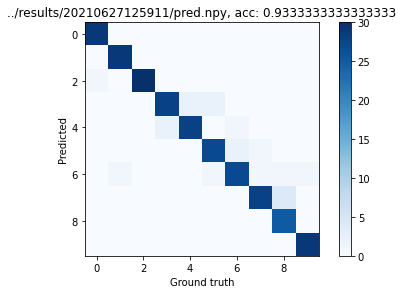

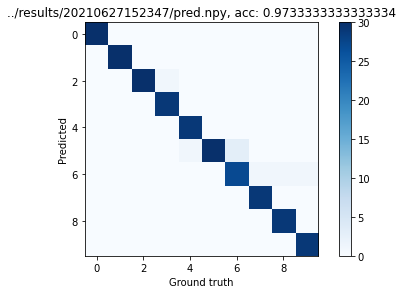

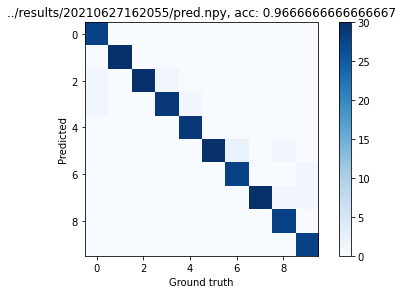

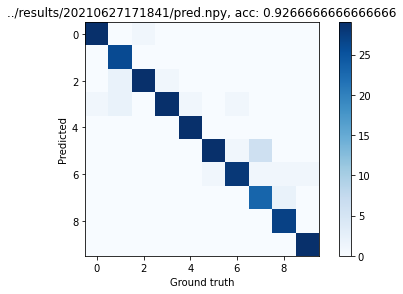

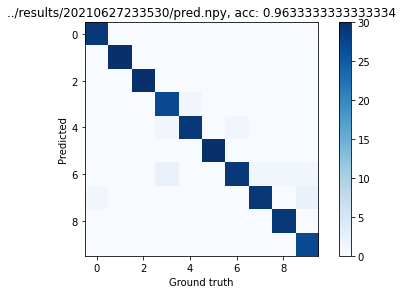

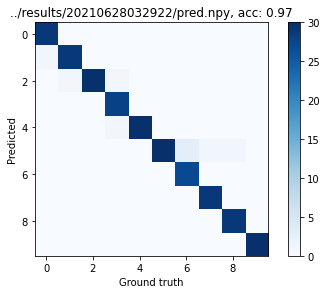

In [24]:
preds_path = Path('../results')
preds_path_list = [str(p) for p in list(preds_path.glob('**/*.npy'))]
preds_path_list.sort()

acc_dict = {}
for p in preds_path_list:
    pred_by_kfold = np.load(p)
    predict = pred_by_kfold.sum(axis=0) // 3
    
    truth_values = test_truth['label'].values
    acc = accuracy_score(truth_values, predict)
    title = str(p) + ', acc: ' + str(acc)
    plot_confusion_matrix(predict, truth_values, title=title)
    
    ts = str(p).split('/')[2]
    acc_dict[ts] = acc

In [26]:
acc_ranking = sorted(acc_dict.items(), key=lambda x:x[1])
for k, v in acc_ranking[::-1]:
    print(k, v)

20210627152347 0.9733333333333334
20210628032922 0.97
20210625053732 0.97
20210627162055 0.9666666666666667
20210627052324 0.9666666666666667
20210625023208 0.9666666666666667
20210627233530 0.9633333333333334
20210627005138 0.9633333333333334
20210627041100 0.96
20210627030438 0.96
20210625152700 0.9533333333333334
20210627081148 0.95
20210626141358 0.95
20210626071022 0.95
20210625225831 0.95
20210627115050 0.9466666666666667
20210627015223 0.9466666666666667
20210627092226 0.9433333333333334
20210626043459 0.9433333333333334
20210625092920 0.9433333333333334
20210625032358 0.9366666666666666
20210627125911 0.9333333333333333
20210626164623 0.9333333333333333
20210626151406 0.93
20210627171841 0.9266666666666666
20210625142418 0.9266666666666666
20210625110746 0.9266666666666666
20210625063114 0.91
20210625130716 0.9066666666666666
20210625082513 0.9066666666666666
20210625073113 0.9033333333333333
20210625122444 0.8933333333333333
20210625113847 0.8933333333333333
20210626085842 0.7